How to add an environment to Jupyter Notebook:<br>
`
conda env list
conda install -c anaconda ipykernel
python -m ipykernel install --user --name=EnvironmentName
`

What I have added in TrialEnv2:<br>
`
conda install python=3.10
conda install numpy
conda install -c conda-forge openbabel
conda install pandas
conda install -c conda-forge rdkit
conda install -c anaconda scikit-learn
`

In [1]:
!conda install -y -c conda-forge openbabel
#Import files
import os
import numpy as np
import keras
import keras.backend as K
from openbabel import pybel, openbabel
from sklearn.model_selection import train_test_split

from data import Featurizer, make_grid
from PUResNet import PUResNet
from train_functions import get_grids, get_training_data, DiceLoss

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.



## Prepare the data

In [2]:
proteins, binding_sites, _ = get_training_data("scPDB_similarproteins")

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4j55_031_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3bva_2NC_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3bva_2NC_1_ligand)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4heg_G52_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2q64_1UN_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2z4o_065_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ucb_017_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3tog_079_2_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3tof_076_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3vfb_031_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1dif_A85_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3pwr_ROC_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3i6o_GR6_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2pyn_1UN_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2hny_NVP_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2bb9_AKC_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2b7z_MK1_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2pwc_G3G_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qnq_QN3_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4hla_017_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3jvw_DMP_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1m0b_0ZQ_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qd7_065_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3t11_3T1_2_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1sdv_MK1_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3kdd_JZQ_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1daz_0Q4_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1daz_0Q4_1_ligand)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3djk_G55_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1a94_0Q4_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1a94_0Q4_1_ligand)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1xl5_190_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1xl2_189_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2az9_3TL_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1zj7_0ZT_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1hpo_UNI_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1hni_AAA_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4hdf_G52_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4dfg_0JV_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2pym_1UN_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2fde_385_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ckt_YDP_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1hsg_MK1_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qci_065_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1sdu_MK1_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3uhl_2NC_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3uhl_2NC_1_ligand)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qd6_065_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4fe6_0TQ_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2az8_3TL_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1sdt_MK1_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1sh9_RIT_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3bvb_017_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ndx_RIT_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3nls_016_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ttp_017_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3jw2_017_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3toh_079_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3vf7_031_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qih_FG7_3_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1sgu_MK1_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4j54_G52_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qn8_NI7_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3st5_G89_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2a1e_IPF_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3t3c_017_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qp0_NI8_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1upj_U01_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1hvl_A76_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2pk6_O33_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qak_1UN_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1rl8_RIT_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qrs_NK8_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1a8k_0Q4_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1a8k_0Q4_1_ligand)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qbf_JHG_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3fx5_KNI_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4j5j_478_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1iiq_0ZR_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2r43_G3G_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3bhe_BZN_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 7upj_INU_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2o4p_TPV_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3vf5_031_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3kdc_JZP_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1msm_JE2_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qrm_NK7_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qd8_065_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ndw_RIT_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ndu_ROC_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ufn_ROC_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2pqz_G0G_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1mrw_K57_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4gb2_0LQ_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2pk5_075_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qhc_AB1_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2hnd_NVP_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2p3b_3TL_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1msn_JE2_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1a8g_2Z4_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3a2o_KNJ_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2pwr_G4G_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3jvy_017_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qih_NI7_2_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4hdb_G52_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2azb_3TL_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qnp_QN2_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2q63_1UN_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3kdb_006_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qpj_N4I_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1d4y_TPV_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2hc0_AB2_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3pwm_017_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1izi_Q50_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1hpx_KNI_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3qro_NK9_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1mrx_K57_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2qnn_QN1_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2ien_017_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3ggu_017_1_protein)



*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 3dk1_G05_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 1d4s_TPV_1_protein)






Number of proteins to train the model: 119


*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 4hdp_G52_1_protein)

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL2 file (title is 2upj_U02_1_protein)



## Train the model

In [3]:
# I have based myself on this tutorial:
# https://keras.io/examples/vision/3D_image_classification/

## DEFINE VARIABLES ##
# In the paper, a batch size of 5 was used.
# They also found DiceLoss to be the best loss function to train the model
batch_size = 5
epochs = 100
loss_function = DiceLoss


## DEFINE CALLBACKS ##
# A Callback is an object that can perform actions at various stages of training
# ModelCheckpoint will save the best weights of the training
# EarlyStopping stops the training when val_loss stops improving
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    filepath="model_weights.h5",
    monitor = "val_loss",
    save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=15)

## TRAIN THE MODEL ##
model = PUResNet()
model.compile(loss=loss_function, optimizer="adam", 
              metrics=["accuracy"])
#model.load_weights("bst_bs_prediction.h5")

model.fit(X_train, y_train, 
          batch_size=batch_size, epochs=epochs, 
          validation_split=0.1, shuffle=True,
          callbacks=[checkpoint_cb, early_stopping_cb])

2023-03-25 19:34:49.349757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 19:34:49.352399: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
15/15 [==============================] - 42s 2s/step - loss: 1.6713 - accuracy: 0.7791 - val_loss: 1.5478 - val_accuracy: 0.9200
Epoch 2/100
15/15 [==============================] - 37s 2s/step - loss: 1.4578 - accuracy: 0.9687 - val_loss: 1.4318 - val_accuracy: 0.9992
Epoch 3/100
15/15 [==============================] - 36s 2s/step - loss: 1.3297 - accuracy: 0.9923 - val_loss: 1.3954 - val_accuracy: 0.9992
Epoch 4/100
15/15 [==============================] - 37s 2s/step - loss: 1.1587 - accuracy: 0.9968 - val_loss: 1.3658 - val_accuracy: 0.9992
Epoch 5/100
15/15 [==============================] - 36s 2s/step - loss: 0.9448 - accuracy: 0.9987 - val_loss: 1.3544 - val_accuracy: 0.9992
Epoch 6/100
15/15 [==============================] - 37s 2s/step - loss: 0.8176 - accuracy: 0.9989 - val_loss: 1.3373 - val_accuracy: 0.9992
Epoch 7/100
15/15 [==============================] - 37s 2s/step - loss: 0.7476 - accuracy: 0.9990 - val_loss: 1.2478 - val_accuracy: 0.9992
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 37s 2s/step - loss: 0.0893 - accuracy: 0.9996 - val_loss: 0.6304 - val_accuracy: 0.9992
Epoch 60/100
15/15 [==============================] - 37s 2s/step - loss: 0.0942 - accuracy: 0.9996 - val_loss: 0.6095 - val_accuracy: 0.9992
Epoch 61/100
15/15 [==============================] - 37s 2s/step - loss: 0.0875 - accuracy: 0.9996 - val_loss: 0.5421 - val_accuracy: 0.9991
Epoch 62/100
15/15 [==============================] - 36s 2s/step - loss: 0.1011 - accuracy: 0.9996 - val_loss: 0.6336 - val_accuracy: 0.9992
Epoch 63/100
15/15 [==============================] - 36s 2s/step - loss: 0.1014 - accuracy: 0.9996 - val_loss: 1.0898 - val_accuracy: 0.9988
Epoch 64/100
15/15 [==============================] - 36s 2s/step - loss: 0.0924 - accuracy: 0.9996 - val_loss: 1.0924 - val_accuracy: 0.9980
Epoch 65/100
15/15 [==============================] - 36s 2s/step - loss: 0.1145 - accuracy: 0.9996 - val_loss: 1.0316 - val_accuracy: 0.9846
Epoch 

## Visualise the model

KeyError: 'accuracy'

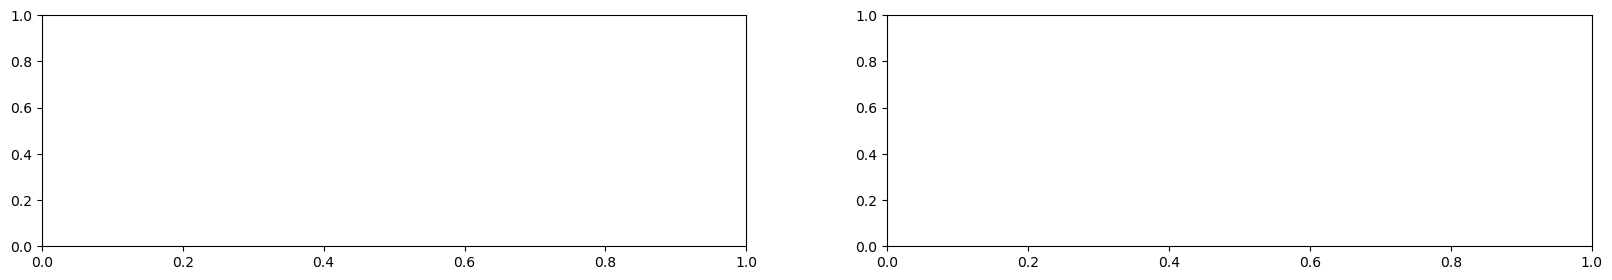

In [11]:
# Visualize the performance of the model
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [46]:
# In order to continue training the model, run this code
# TODO - Should save the checkpoints in a file so that I can concatenate them
batch_size = 5
epochs = 30

model.load_weights("bst_bs_prediction.h5")

model.fit(X_train, y_train, 
          batch_size=batch_size, epochs=epochs, 
          validation_split=0.1, shuffle=True,
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
1/6 [====>.........................] - ETA: 28s - loss: 0.4543 - accuracy: 0.9995

KeyboardInterrupt: 